In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

Loading the Data

In [3]:
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Handling Data, Missing Values, Normalizing, Scaling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
null_values = df.isnull().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
total_cells = np.product(df.shape)
total_missing = null_values.sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of total data",percent_missing)

percentage_null_age = (df['Age'].isnull().sum()/df['Age'].shape[0]) *100
percentage_null_cabin = (df['Cabin'].isnull().sum()/df['Cabin'].shape[0]) *100

print(f"Percentage Age: %{percentage_null_age}\nPercentage Cabin: % {percentage_null_cabin}")

Percentage of total data 8.099513655069211
Percentage Age: % 19.865319865319865 Percentage Cabin: % 77.10437710437711


- 8% of the data is missing, this is few data
- 19% of the Age data is missing, which for this I will use the average age
- 77% of the cabin data is missing, which for this I will probably drop the column due to >50% of data is missing

## Data Dropping
- In theory, it is not relevant passanger name, port of embarcation. b/c this variables will not influence the outcome
- IDK if Sibs/Parch is relevant in this case.
- Passanger ID doesnt tells me anything about data

In [7]:
df.drop('Embarked', axis= 1, inplace=True)



In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.dropna(axis=1)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Converting Categorical Variables into Numerical


In [10]:
#Sex is a binary (Male/Female)
s = 'Sex'
LE=LabelEncoder()

df[s]=df[[s]].apply(LE.fit_transform)

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 66.3+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [12]:
df['Ticket'].unique


<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [13]:
#due to all tickets being unique values, there will be no relation between the ticket number and anything. So it will also be discarded
df.drop('Ticket', axis= 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.3+ KB


In [14]:
df['Title']=df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]


In [15]:
def sortingTitles(title):
    if  title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "3"
    elif title in ["Major", "Col", "Dr"]:
        return "2"
    else:
        return "1"

In [16]:
df['Title']=df['Title'].apply(sortingTitles)

df['Title']=df['Title'].astype('int64')



df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1


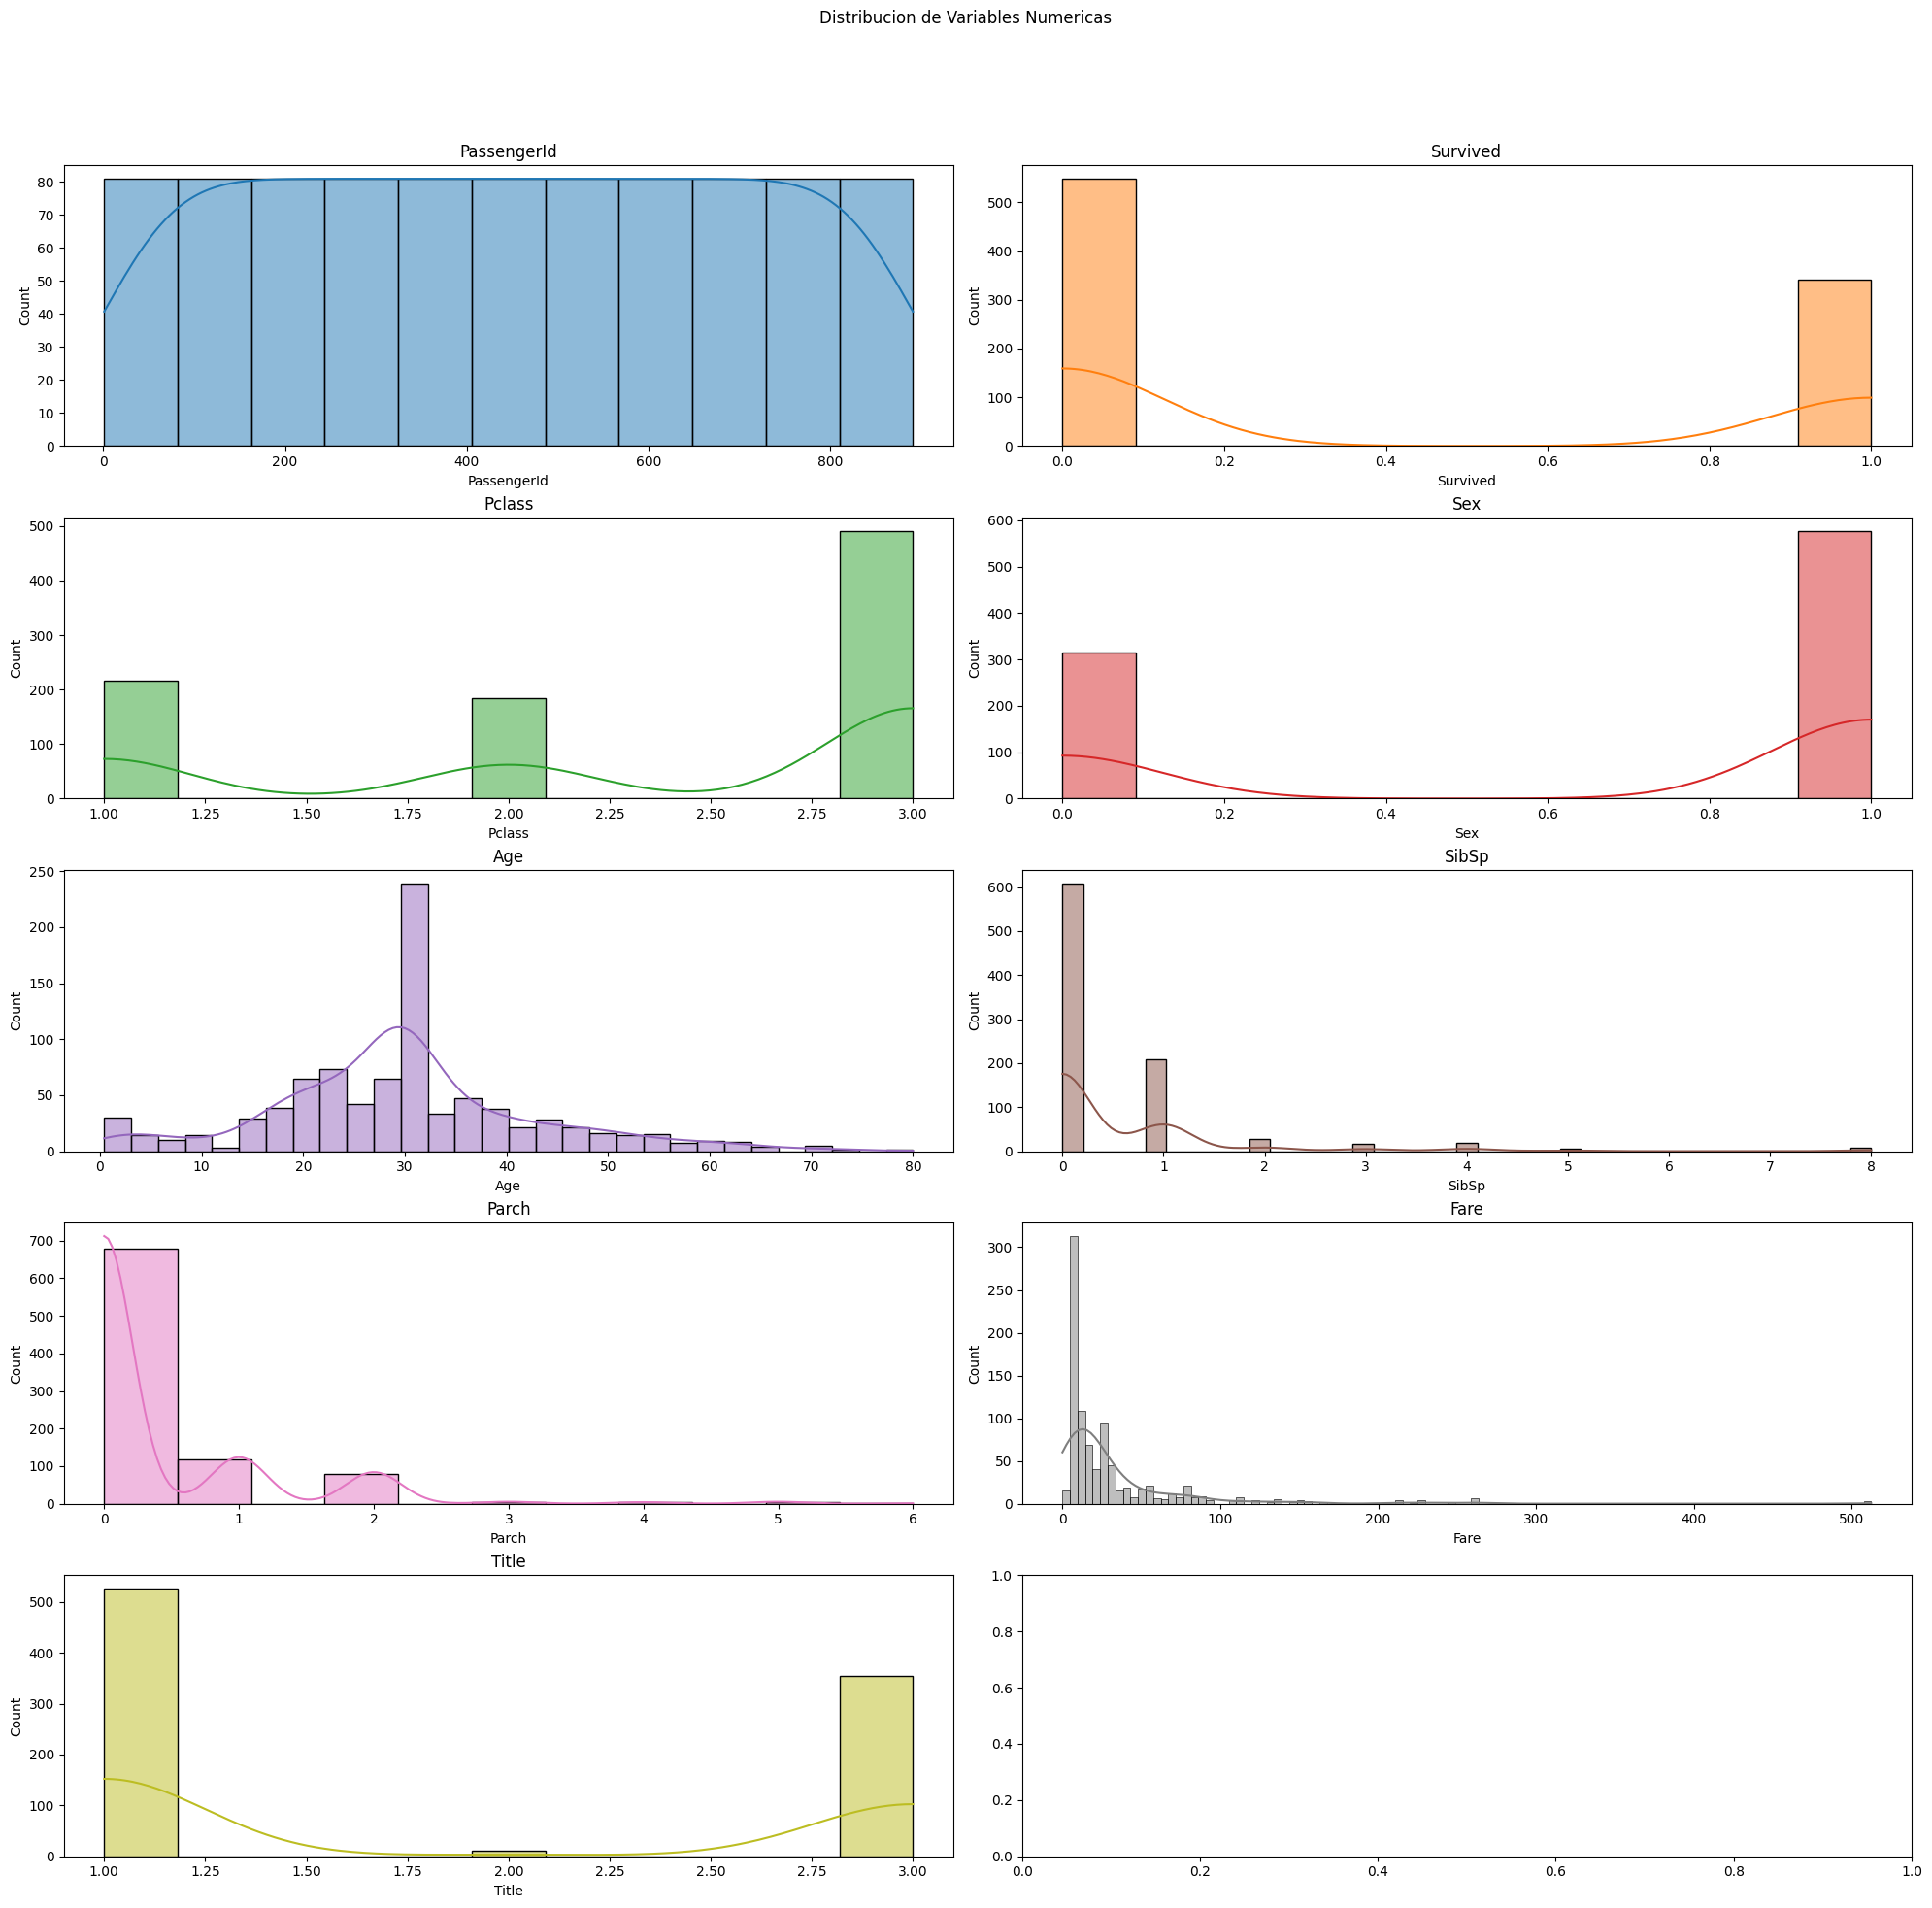

In [18]:
#Now all variables are numerical
##Estadistica Univariada
##Histogramas de frecuencia para variables numericas
fig, ax = plt.subplots(5,2, figsize = (20,20))
ax = ax.flat
num_col = df.select_dtypes(include=['int64','float64','int32']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = df, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'],ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Distribucion de Variables Numericas')
plt.show()

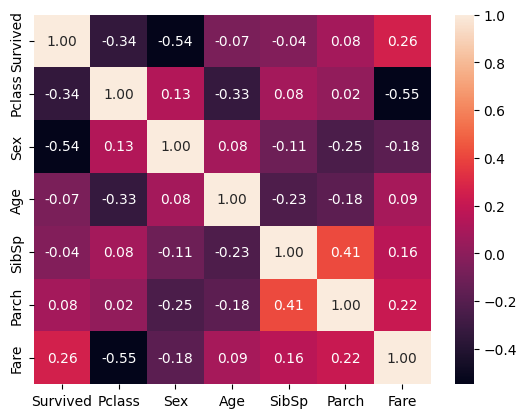

In [174]:
sb.heatmap(data = df.corr(numeric_only= True), annot=True, fmt = '0.2f')
plt.show()

In [ ]:
X = df.drop(['Survived'],axis = 1)

y = df['Survived']